In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import joblib
import phik
import seaborn as sns
import matplotlib.pyplot as plt
from phik import resources, report

In [2]:
# Import necessary libraries

# Load the dataset
data = pd.read_csv('../data/electric-consumption (2).csv')

# Define features and target variable
features = ['oc3', 'al4', 'pet2', 'can', 'gbl', 'sachet', 'enmix', 'date_type', 'status_process']
target = 'electric_consume'

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical and categorical features
numeric_features = ['oc3', 'al4', 'pet2', 'can', 'gbl', 'sachet', 'enmix']
categorical_features = ['date_type', 'status_process']



interval columns not set, guessing: ['oc3', 'al4', 'pet2', 'can', 'gbl', 'sachet', 'enmix', 'status_process', 'electric_consume']


/usr/local/python/3.12.1/lib/python3.12/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable date is large: 1035. Are you sure this is not an interval variable? Analysis for pairs of variables including date can be slow.
  warnings.warn(


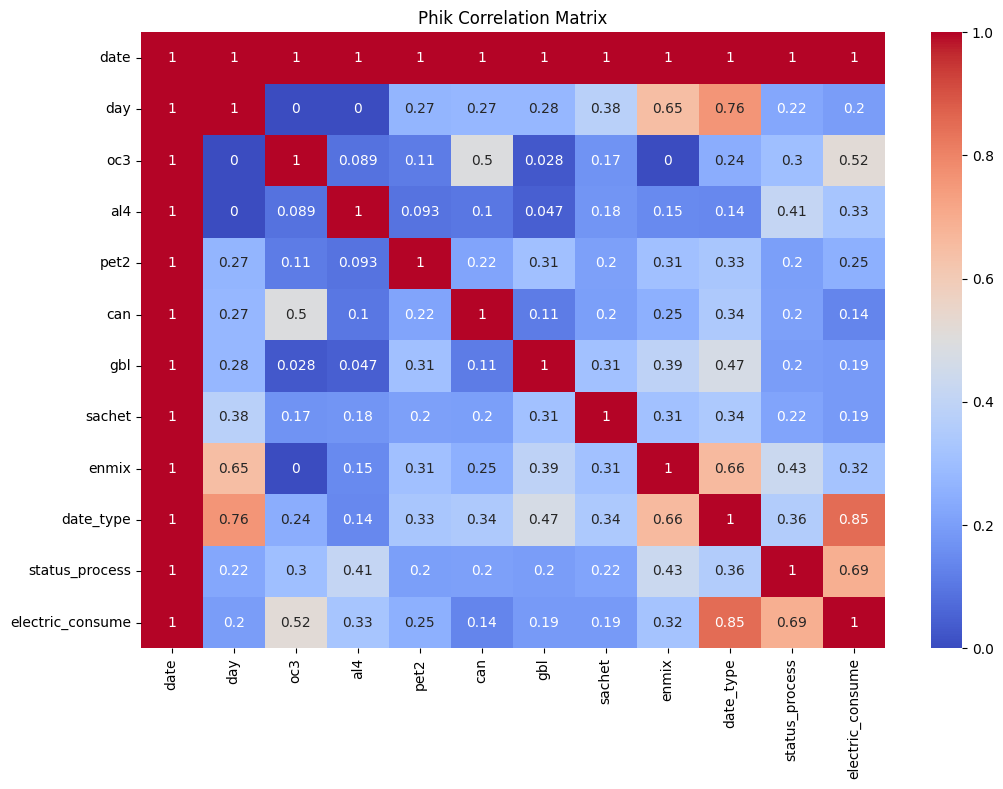

In [5]:
# Perform correlation analysis using phik

# Calculate the correlation matrix
phik_matrix = data.phik_matrix()
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm')
plt.title('Phik Correlation Matrix')
plt.show()

In [6]:
# Data exploration
print("Data Head:")
print(data.head())

print("\nData Info:")
print(data.info())

print("\nData Description:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nUnique Values in Categorical Features:")
for col in categorical_features:
  print(f"{col}: {data[col].nunique()} unique values")

Data Head:
       date        day     oc3      al4    pet2  can  gbl  sachet   enmix  \
0  1/1/2022   Saturday       0        0       0    0    0       0       0   
1  1/2/2022     Sunday  441240        0       0    0    0       0       0   
2  1/3/2022     Monday  204816  1289657  645326    0    0       0  179835   
3  1/4/2022    Tuesday       0  1305874  968366    0    0       0  179835   
4  1/5/2022  Wednesday  903072  1207543  969703    0    0       0  209808   

  date_type  status_process  electric_consume  
0   weekend               0             50752  
1   weekend               1             56624  
2   workday               1             81504  
3   workday               1             93808  
4   workday               1            114544  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1035

In [6]:
preprocessor = ColumnTransformer(
  transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
  ])

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Save the model
joblib.dump(model, 'electric_consumption_model.pkl')


Mean Absolute Error: 12123.323630183251


['electric_consumption_model.pkl']

In [ ]:
# Load the saved model
loaded_model = joblib.load('electric_consumption_model.pkl')

# Make predictions on the test set
new_predictions = loaded_model.predict(X_test)

# Display the predictions
print(new_predictions)

In [ ]:
# Create dummy data
sample_data_input = pd.DataFrame({
  'oc3': [0.5, 0.7],
  'al4': [0.3, 0.6],
  'pet2': [0.2, 0.8],
  'can': [0.1, 0.4],
  'gbl': [0.5, 0.9],
  'sachet': [0.3, 0.7],
  'enmix': [0.4, 0.6],
  'date_type': ['workday', 'weekend'],
  'status_process': [1, 1]
})

# Make predictions on the dummy data
dummy_predictions = loaded_model.predict(sample_data_input)

# Display the predictions
print(dummy_predictions)